Problem Statement - Given the dataset which captures gross salary of the employees and by training with such data we want to predict salary of the employees in the test data.

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split


In [2]:
salary = pd.read_csv('train_salary.csv')

In [3]:
salary

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95
...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12


In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [29]:
df = salary.copy()

In [30]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [31]:
df.columns = df.columns.str.strip()

In [32]:
df.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [33]:
df['AnnualSalary'] = df['AnnualSalary'].apply(lambda x: float(str(x)[1:]))

In [34]:
df

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,$39686.95
...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,11310.0,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,11310.0,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,43999.0,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,44104.0,$48608.12


In [35]:
df.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [36]:
df['HireDate'] = df['HireDate'].fillna(method='ffill')

In [37]:
df.drop('GrossPay',axis=1,inplace=True)

In [38]:
df.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

##  which agency id has more hirings 

In [39]:
df.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02539      1
A65052      1
W02106      1
W02590      1
W02339      1
Name: AgencyID, Length: 1177, dtype: int64

In [40]:
df.Agency.value_counts()

Youth Summer                4323
Police Department           3211
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64

In [41]:
df.JobTitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
VEHICLE DAMAGE INVESTIGATOR          1
Community Health Nurse I             1
ACCOUNTING SYSTEMS ANALYST           1
DESK TOP PUBLISHING COORDINATO       1
Research Analyst II                  1
Name: JobTitle, Length: 1075, dtype: int64

Text(0.5, 1.0, 'Annual Salary Distribution Plot')

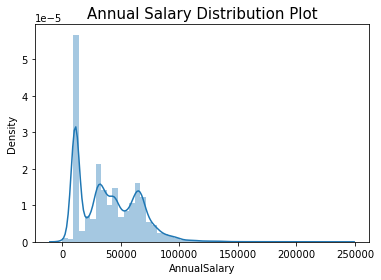

In [42]:
sns.distplot(df.AnnualSalary)
plt.title('Annual Salary Distribution Plot', fontsize=15)

<AxesSubplot:>

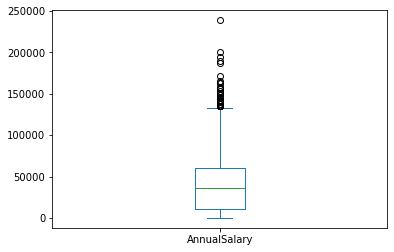

In [43]:
df.AnnualSalary.plot.box()

In [44]:
df.shape

(18981, 6)

In [49]:
df = df[df['AnnualSalary']<140000]

In [58]:
len(df[df['AnnualSalary']>140000])

0

<AxesSubplot:>

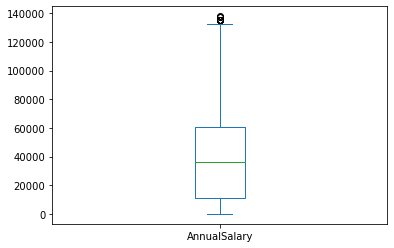

In [50]:
df.AnnualSalary.plot.box()

In [51]:
df

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0
...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,11310.0
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,11310.0
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,43999.0
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,44104.0


In [52]:
df['HireDay'] = df['HireDate'].apply(lambda x: int(str(x[3:5])))

In [53]:
df

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24
...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,11310.0,21
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,11310.0,21
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,43999.0,17
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,44104.0,23


In [55]:
df['Hiremonth'] = df['HireDate'].apply(lambda x: int(str(x[0:2])))

In [56]:
df['Hireyear'] = df['HireDate'].apply(lambda x: int(str(x[6:])))

In [57]:
df

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,Hiremonth,Hireyear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,11310.0,21,5,2014
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,11310.0,21,5,2014
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,43999.0,17,12,2013
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,44104.0,23,1,2013


<AxesSubplot:xlabel='JobTitle'>

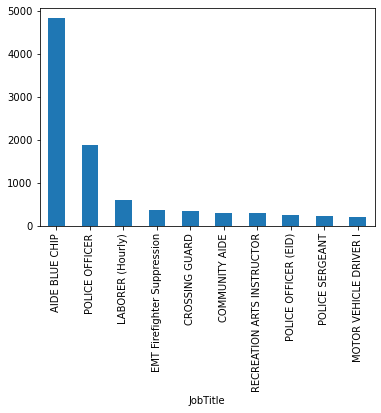

In [59]:
######### EDA
### Top 10 jobs based on hirings
df.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()

<AxesSubplot:xlabel='JobTitle'>

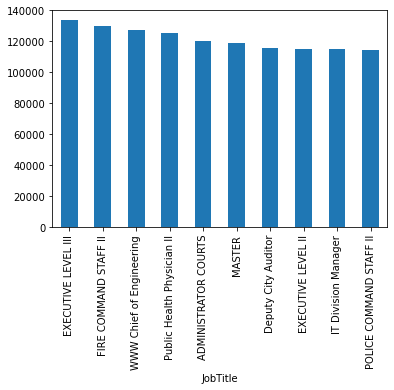

In [60]:
## top 10 jobs that fetch highest salary
df.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()

<AxesSubplot:xlabel='AgencyID'>

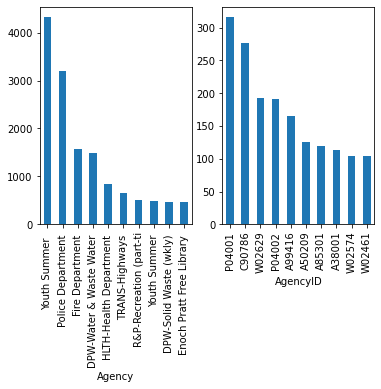

In [64]:
### top agencies with higher number of emplyees
## top agencyids with higher number of employees
plt.subplot(1,2,1)
df.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.subplot(1,2,2)
df.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()

<AxesSubplot:xlabel='AgencyID'>

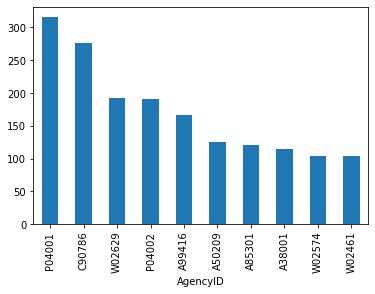

In [63]:
df.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()

In [36]:
## the jobs whose average pay is more than total avaerage salary of entire data

mean_job = df.AnnualSalary.mean()

good_paying_jobs = df.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()



In [39]:
good_paying_jobs[good_paying_jobs['AnnualSalary']> mean_job]['JobTitle'].count()

807

In [43]:
len(df.JobTitle.unique())

1069

In [44]:
df.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'HireDay', 'Hiremonth', 'Hireyear'],
      dtype='object')

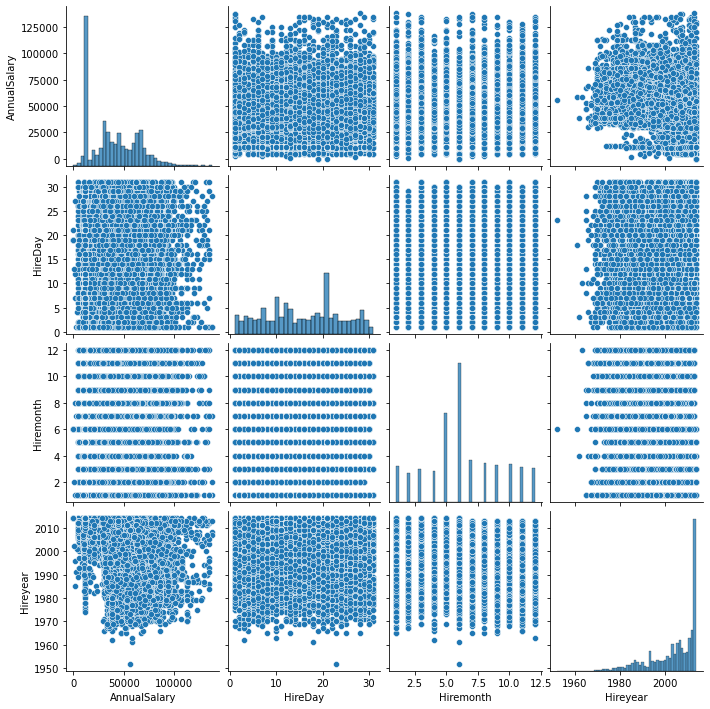

In [45]:
sns.pairplot(df)

<AxesSubplot:>

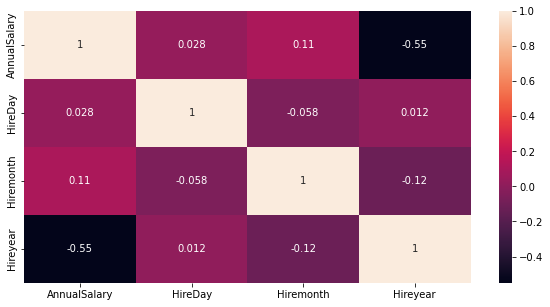

In [47]:
## plot a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

## Feature engineering

In [48]:
df

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,Hiremonth,Hireyear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,11310.0,21,5,2014
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,11310.0,21,5,2014
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,43999.0,17,12,2013
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,44104.0,23,1,2013


In [49]:
mean_job = df.groupby(['JobTitle'])['AnnualSalary'].mean()
df['JobTitle'] = df['JobTitle'].map(mean_job)

In [50]:
df

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,Hiremonth,Hireyear
0,"Aaron,Keontae E",11313.967200,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",47443.500000,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",69750.666667,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",57940.000000,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",44531.160494,A99416,Police Department,07/24/2013,43999.0,24,7,2013
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",11313.967200,W02235,Youth Summer,05/21/2014,11310.0,21,5,2014
18977,"Zotamou,Pivot D",11313.967200,W02629,Youth Summer,05/21/2014,11310.0,21,5,2014
18978,"Zovistoski,Zachary D",44531.160494,A99416,Police Department,12/17/2013,43999.0,17,12,2013
18979,"Zubyk,Stanislav T",60588.139335,A99262,Police Department,01/23/2013,44104.0,23,1,2013


In [51]:
mean_agency = df.groupby(['Agency'])['AnnualSalary'].mean()
df['Agency'] = df['Agency'].map(mean_agency)

In [52]:
mean_agencyid = df.groupby(['AgencyID'])['AnnualSalary'].mean()
df['AgencyID'] = df['AgencyID'].map(mean_agencyid)

In [53]:
df

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,Hiremonth,Hireyear
0,"Aaron,Keontae E",11313.967200,11310.000000,11310.270645,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",47443.500000,46667.000000,51495.424242,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",69750.666667,65926.133333,64874.560224,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",57940.000000,48071.851064,39980.900360,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",44531.160494,44012.307229,61575.070137,07/24/2013,43999.0,24,7,2013
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",11313.967200,11310.000000,11310.270645,05/21/2014,11310.0,21,5,2014
18977,"Zotamou,Pivot D",11313.967200,11310.000000,11346.315789,05/21/2014,11310.0,21,5,2014
18978,"Zovistoski,Zachary D",44531.160494,44012.307229,61575.070137,12/17/2013,43999.0,17,12,2013
18979,"Zubyk,Stanislav T",60588.139335,60203.340426,61575.070137,01/23/2013,44104.0,23,1,2013


In [54]:
df = df.drop(['HireDate','Name'],axis=1)

In [55]:
df

,JobTitle,AgencyID,Agency,AnnualSalary,HireDay,Hiremonth,Hireyear
0,11313.967200,11310.000000,11310.270645,11310.0,10,6,2013
1,47443.500000,46667.000000,51495.424242,53428.0,24,10,1979
2,69750.666667,65926.133333,64874.560224,68300.0,25,9,2006
3,57940.000000,48071.851064,39980.900360,62000.0,23,7,2009
4,44531.160494,44012.307229,61575.070137,43999.0,24,7,2013
...,...,...,...,...,...,...,...
18976,11313.967200,11310.000000,11310.270645,11310.0,21,5,2014
18977,11313.967200,11310.000000,11346.315789,11310.0,21,5,2014
18978,44531.160494,44012.307229,61575.070137,43999.0,17,12,2013
18979,60588.139335,60203.340426,61575.070137,44104.0,23,1,2013


In [118]:
### 
train, test = train_test_split(df,train_size=0.7,random_state=42)

In [119]:
print(train.shape)

(13268, 7)


In [120]:
test.shape

(5687, 7)

In [121]:
y_train = train.pop("AnnualSalary")
x_train = train

In [122]:
y_test = test.pop("AnnualSalary")
x_test = test

In [123]:
x_test

,JobTitle,AgencyID,Agency,HireDay,Hiremonth,Hireyear
12254,60588.139335,58642.057692,61575.070137,5,2,2007
16780,30643.613636,40772.250000,39950.622030,26,4,2004
8258,11313.967200,11310.000000,11310.270645,12,6,2012
16229,30472.508475,34247.775510,34172.489691,30,6,2008
14077,21570.423841,31520.387097,33920.215385,5,12,2012
...,...,...,...,...,...,...
1189,23309.565217,22019.629747,21236.522682,7,6,2011
15501,42835.743590,43675.954023,48931.949458,20,3,1997
6890,70763.333333,71421.038462,61575.070137,26,11,2007
14859,35290.283422,34028.074074,44092.921659,9,7,1990


In [124]:
## scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])

In [125]:
x_train.describe()

,JobTitle,AgencyID,Agency,HireDay,Hiremonth,Hireyear
count,1.326800e+04,1.326800e+04,1.326800e+04,1.326800e+04,1.326800e+04,1.326800e+04
mean,3.875990e-16,-1.975775e-16,4.680459e-16,2.873710e-16,-2.329393e-16,-1.069455e-14
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.628872e+00,-1.691083e+00,-1.396684e+00,-1.760987e+00,-1.826782e+00,-4.978800e+00
25%,-1.163646e+00,-1.272358e+00,-1.343687e+00,-8.065389e-01,-4.682402e-01,-5.717941e-01
50%,-1.476768e-01,8.975670e-02,1.444805e-01,2.860360e-02,-1.286048e-01,2.904461e-01
75%,8.624882e-01,9.090018e-01,1.050635e+00,7.444400e-01,5.506660e-01,8.652729e-01
max,3.872931e+00,2.874863e+00,1.954996e+00,1.818195e+00,1.909208e+00,9.610774e-01


In [126]:
x_test[x_test.columns] = scaler.fit_transform(x_test[x_test.columns])

In [127]:
lr = LinearRegression()
salary_reg = lr.fit(x_train,y_train)

In [128]:
salary_reg.score(x_train,y_train)

0.9653022212425093

In [129]:
y_pred = salary_reg.predict(x_test)

In [130]:
y_test

12254    60598.0
16780    31740.0
8258     11310.0
16229    31427.0
14077    20800.0
          ...   
1189     20800.0
15501    45477.0
6890     71444.0
14859    36203.0
14254    29245.0
Name: AnnualSalary, Length: 5687, dtype: float64

In [131]:
y_pred

array([59180.00619377, 31601.63894618, 10812.80862476, ...,
       69900.53788248, 37605.67234815, 30070.44929754])

In [132]:
salary_reg.coef_

array([22305.43907571,  2750.07148661, -1785.86524596,   -24.54954802,
         -73.45513709, -2135.94854756])

In [133]:
salary_reg.intercept_

39615.733070545655

In [134]:
model = str(salary_reg.intercept_)
for i in range(len(salary_reg.coef_)):
    model = model + ' + ' +(str(salary_reg.coef_[i])) +' * ' + (str(x_train.columns[i]))
model    

'39615.733070545655 + 22305.439075707913 * JobTitle + 2750.0714866090448 * AgencyID + -1785.8652459622228 * Agency + -24.54954802318722 * HireDay + -73.45513709468939 * Hiremonth + -2135.9485475594233 * Hireyear'

In [135]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9657677933984433

In [ ]:
9659